In [1]:
from transformers import AutoImageProcessor, ResNetForImageClassification
import torchvision
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
processor = AutoImageProcessor.from_pretrained("microsoft/resnet-50")
model = ResNetForImageClassification.from_pretrained("microsoft/resnet-50").to(device = device)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [40]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [38]:
#Freeze model
for param in model.parameters():
    param.require_grad = False

In [39]:
#mod0 = torch.nn.Conv2d(1,3,224,bias = False)
mod0 = torch.nn.Linear(1,224*224*3, device=device)

In [41]:
dummy_input = torch.tensor(data=[1.0], device = device)
dummy_input

tensor([1.])

In [36]:
temp = mod0(dummy_input)
temp2 = temp.reshape((1,3,224,224))

In [50]:
target = torch.empty(1, dtype=torch.long).random_(5)
target

tensor([1])

In [66]:
#Model loop
for i in range(5):
    print(i)
    out1 = mod0(dummy_input).reshape((1,3,224,224))
    y_pred = model(out1).logits
    loss = loss_fn(y_pred, torch.tensor([282]))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(float(loss))
    

0
0.0
1
0.0
2
0.0
3
0.0
4
0.0


In [53]:
import matplotlib.pyplot as plt

In [67]:
mod0.weight.reshape((1,3,224,224))

tensor([[[[-0.5455,  0.5666,  0.5043,  ...,  0.8834,  0.5624, -0.9351],
          [-0.9167,  0.2018, -0.6608,  ..., -0.4908, -0.2322,  0.8840],
          [-0.9530, -0.0226, -0.7066,  ...,  0.0656,  0.0428,  0.8151],
          ...,
          [-0.1035, -0.7732,  0.0904,  ..., -0.7786,  0.5691, -0.3879],
          [-0.1722, -0.1675,  0.9816,  ..., -0.1931,  0.5231,  0.3686],
          [-0.5113,  0.0941,  0.0084,  ..., -0.9640,  0.3570,  0.3264]],

         [[ 0.9793,  0.7731,  0.5498,  ...,  0.2810,  0.8766, -0.2151],
          [ 0.0676, -0.4774,  0.3628,  ..., -0.2608, -0.0953,  0.4870],
          [-0.0523,  0.6987,  0.6919,  ...,  0.2665,  0.7310,  0.2799],
          ...,
          [ 0.4960, -0.9209, -0.3561,  ..., -0.9370,  0.5538, -0.0378],
          [-0.2920,  0.9703,  0.0228,  ...,  0.3091,  0.6502, -0.7732],
          [-0.8074, -0.7361,  0.2460,  ..., -0.7422, -0.1934,  0.9986]],

         [[-0.9835,  0.7516, -0.2090,  ..., -0.5058, -0.7740,  0.8215],
          [ 0.3122, -0.1821,  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


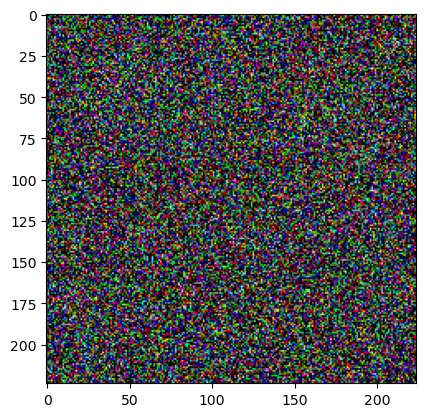

In [70]:
plt.imshow(mod0.weight.detach().reshape((3,224,224)).permute(1,2,0))

In [74]:
samp_image = mod0.weight.detach().reshape((1,3,224,224))
logits = model(samp_image).logits
predicted_label = logits.argmax(-1).item()
print(model.config.id2label[predicted_label])

tiger cat


In [78]:
logits.size()

torch.Size([1, 1000])

In [75]:
predicted_label

282

In [126]:
from datasets import load_dataset

dataset = load_dataset("huggingface/cats-image")
image = dataset["test"]["image"][0]

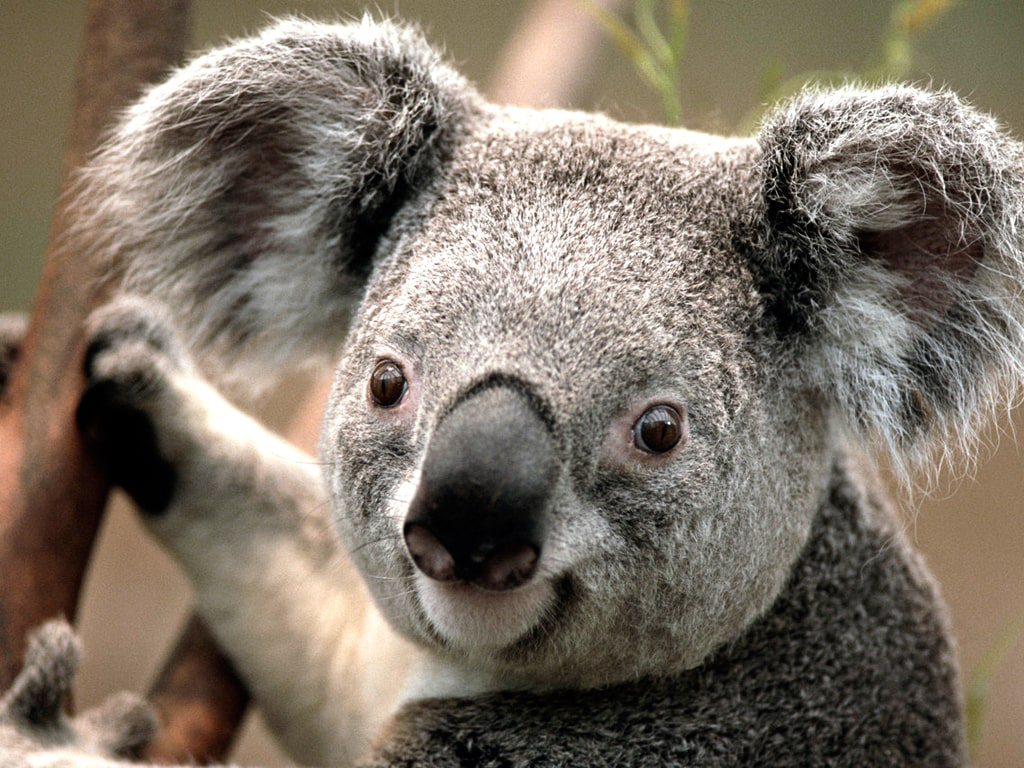

In [134]:
import urllib.request 
from PIL import Image 


url = "https://media.geeksforgeeks.org/wp-content/uploads/20210420115223/Koalainputimage.jpg"
urllib.request.urlretrieve(url, "test.png") 
image = Image.open(r"test.png") 
image

In [135]:
inputs = processor(image, return_tensors="pt").to(device = device)
img_tensor = inputs['pixel_values'][0]

In [136]:
img_tensor.size()

torch.Size([3, 224, 224])

In [86]:
samp_image2 = samp_image.reshape(img_tensor.size())

In [138]:
test_image = img_tensor + samp_image2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


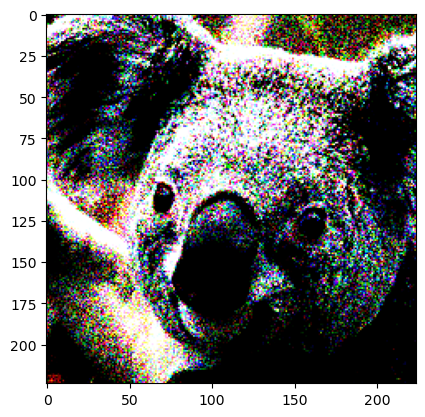

In [146]:
plt.imshow(test_image.permute(1,2,0))

In [140]:
logits = model(test_image.reshape((1,3,224,224))).logits
predicted_label = logits.argmax(-1).item()
print(model.config.id2label[predicted_label])

tiger cat


In [141]:
mean, std = test_image.mean([1,2]), test_image.std([1,2])

In [142]:
mean,std

(tensor([0.1127, 0.0971, 0.1424]), tensor([1.2740, 1.2395, 1.2097]))

In [143]:
transform_norm = torchvision.transforms.Normalize(mean, std)

In [144]:
test_image = transform_norm(test_image)
logits = model(test_image.reshape((1,3,224,224))).logits
predicted_label = logits.argmax(-1).item()
print(model.config.id2label[predicted_label])

tiger cat


In [145]:
logits.max(1)

torch.return_types.max(
values=tensor([16.7212], grad_fn=<MaxBackward0>),
indices=tensor([282]))